In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt

# Variance Inflation Factor

In [2]:
# multicollinearity
X1 = np.array([1, 2, 3, 4])
X2 = np.array([2, 4, 6, 8])
Y = 2 + X1 + X2 + 0.1 * np.random.normal(0, 0.5, 4)
df = pd.DataFrame({"X1": X1, "X2": X2})
results = sm.OLS(Y, sm.add_constant(df)).fit()
results.params

const    2.100333
X1       0.592496
X2       1.184993
dtype: float64

In [3]:
variance_inflation_factor(df, 0)

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


np.float64(inf)

In [4]:
Y - (2 - 101 * X1 + 52 * X2)

array([ 0.02184832,  0.10074973, -0.04023284, -0.05621923])

In [5]:
num = 100000
np.random.seed(0)
X1 = np.random.normal(0, 1, (num,))
X2 = X1 + np.random.normal(0, 1, (num,))
X3 = X1 + np.random.normal(0, 1, (num,))
X4 = X1 + np.random.normal(0, 1, (num,))
Y = 2 + X1 + X2 + X3 + X4 + np.random.normal(0, 1, (num,))
df = pd.DataFrame({"X1": X1, "X2": X2, "X3": X3, "X4": X4})
results = sm.OLS(Y, df).fit()
results.params

X1    0.989071
X2    1.014330
X3    0.991308
X4    1.009498
dtype: float64

In [6]:
num = 1000
np.random.seed(0)
X1 = np.random.normal(0, 1, (num,))
X2 = X1 + np.random.normal(0, 1, (num,))
X3 = X1 + np.random.normal(0, 1, (num,))
X4 = X1 + np.random.poisson(1, (num,))
Y = X1 + X2 + X3 + X4 + np.random.normal(0, 1, (num,))
df = pd.DataFrame({"X1": X1, "X2": X2, "X3": X3, "X4": X4})

In [7]:
results = sm.OLS(Y, df).fit()
results.params

X1    0.972530
X2    0.971749
X3    1.052539
X4    1.001313
dtype: float64

In [8]:
variance_inflation_factor(df, 0) # how well can feature 0 be predicted by linearly combining the others?  (1 = lowest)
# 1 / (1 - R^2)

np.float64(3.5755555472094978)

In [9]:
for n in range(len(df.columns)):
    print(variance_inflation_factor(df, n), n)

3.5755555472094978 0
1.977883027827118 1
2.0029796519294902 2
1.535775335023342 3


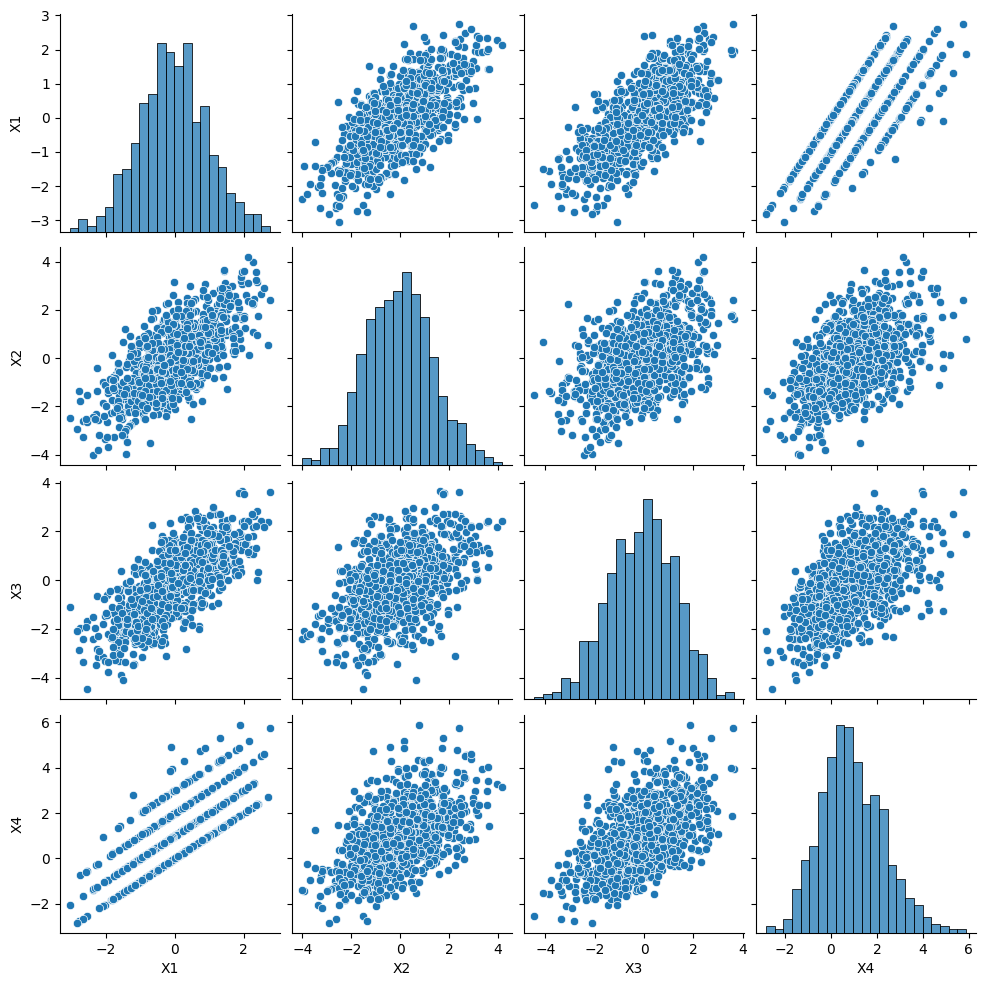

In [10]:
sns.pairplot(df)

In [11]:
X1 = np.random.normal(0, 1, 1000)
X2 = X1 + 0.333 * np.random.normal(0, 1, 1000)
df = pd.DataFrame({"X1": X1, "X2": X2})
variance_inflation_factor(df, 1)

np.float64(10.675647654334838)

In [12]:
def func(corr_const):
    return 1 / corr_const

np.random.seed(0)
for corr_const in range(1, 10):
    num = 1000
    X1 = np.random.normal(0, 1, (num,))
    X2 = X1 + func(corr_const) * np.random.normal(0, 1, (num,))
    X3 = np.random.normal(0, 1, (num,))
    X4 = np.random.poisson(1, (num,))
    df = pd.DataFrame({"X1": X1, "X2": X2, "X3": X3, "X4": X4})
    print(func(corr_const), variance_inflation_factor(df, 0))
    if(variance_inflation_factor(df, 0) > 5 and variance_inflation_factor(df, 0) < 10):
        print("Moderately high")
    if(variance_inflation_factor(df, 0) >= 10):
        print("Very high")

1.0 1.9790302098117611
0.5 4.846431170512529
0.3333333333333333 9.169467307283567
Moderately high
0.25 15.40738684451113
Very high
0.2 24.05557009464992
Very high
0.16666666666666666 41.064563333651435
Very high
0.14285714285714285 53.1864691575789
Very high
0.125 69.18270371426617
Very high
0.1111111111111111 75.92724304979538
Very high


In [13]:
num = 1000
for corr_const in [3, 5, 10, 15, 20, 100]:
    np.random.seed(0)
    X1 = np.random.normal(0, 1, (num,))
    X2 = X1 + func(corr_const) * np.random.normal(0, 1, (num,))
    X3 = np.random.normal(0, 1, (num,))
    X4 = np.random.poisson(1, (num,))
    Y = X1 + X2 + X3 + X4 + np.random.normal(0, 1, (num,))
    df = pd.DataFrame({"X1": X1, "X2": X2, "X3": X3, "X4": X4})
    model = sm.OLS(Y, sm.add_constant(df))
    results = model.fit()
    print(corr_const, list(results.params))

3 [0.01925876934794791, 1.0842819076207668, 0.9146719920398727, 1.0530195434938534, 0.9909982345296541]
5 [0.019258769347947388, 1.1411672462608515, 0.8577866533997889, 1.053019543493853, 0.9909982345296549]
10 [0.01925876934794693, 1.283380592861066, 0.7155733067995742, 1.0530195434938525, 0.9909982345296549]
15 [0.01925876934794752, 1.4255939394612742, 0.5733599601993676, 1.0530195434938532, 0.9909982345296547]
20 [0.019258769347947242, 1.5678072860614876, 0.43114661359915224, 1.053019543493852, 0.9909982345296544]
100 [0.01925876934794618, 3.843220831665043, -1.8442669320044, 1.0530195434938536, 0.990998234529655]


# Polynomial and Interaction Terms

In [14]:
num = 1000
X1 = np.random.normal(0, 1, (num,))
X2 = np.random.normal(0, 1, (num,))
Y = X1 + X2 + 3 * X1**2 + 4 * X1 * X2 + np.random.normal(0, 1, (num,))
df = pd.DataFrame({"X1": X1, "X2": X2, "X1_sq": X1**2, "X_int": X1 * X2})
results = sm.OLS(Y, sm.add_constant(df)).fit()
results.params

const   -0.060443
X1       1.004554
X2       1.025919
X1_sq    3.027614
X_int    3.977574
dtype: float64

In [15]:
num = 100000
pd.set_option('display.max_rows', 200)
X1 = np.random.normal(0, 1, (num,))
X2 = np.random.normal(0, 1, (num,))
Y = X1 + 2 * X2 + 3 * X1**2 + 4 * X1 * X2 + np.random.normal(0, 1, (num,))
df = pd.DataFrame({"X1": X1, "X2": X2, "X1_sq": X1**2, "X2_sq": X2**2, "X1_X2": X1 * X2})
results = sm.OLS(Y, sm.add_constant(df)).fit()
results.params

const   -0.002008
X1       1.003378
X2       1.999813
X1_sq    2.998705
X2_sq    0.001787
X1_X2    4.000419
dtype: float64

In [16]:
for n in range(3, 20):
    df[f"X_{n}"] = X1**n
results = sm.OLS(Y, sm.add_constant(df)).fit()
results.params

const   -3.094490e-03
X1       1.020938e+00
X2       1.999799e+00
X1_sq    3.012156e+00
X2_sq    1.817481e-03
X1_X2    4.000443e+00
X_3     -5.161246e-02
X_4     -1.487281e-02
X_5      4.758477e-02
X_6      5.320614e-03
X_7     -2.072093e-02
X_8     -1.281244e-03
X_9      4.933545e-03
X_10     3.047890e-04
X_11    -6.851215e-04
X_12    -5.102630e-05
X_13     5.575101e-05
X_14     4.714076e-06
X_15    -2.516843e-06
X_16    -2.163691e-07
X_17     5.430356e-08
X_18     3.867956e-09
X_19    -3.562381e-10
dtype: float64

### Try adding more terms - maybe 10 or 20

In [17]:
pd.cut(df.X1, bins = 20)

0         (1.059, 1.514]
1          (0.15, 0.604]
2         (-0.305, 0.15]
3          (0.15, 0.604]
4          (0.15, 0.604]
              ...       
99995     (-0.305, 0.15]
99996     (0.604, 1.059]
99997    (-0.76, -0.305]
99998    (-0.76, -0.305]
99999     (0.604, 1.059]
Name: X1, Length: 100000, dtype: category
Categories (20, interval[float64, right]): [(-4.861, -4.397] < (-4.397, -3.943] < (-3.943, -3.488] < (-3.488, -3.033] ... (2.423, 2.878] < (2.878, 3.332] < (3.332, 3.787] < (3.787, 4.242]]

/tmp/ipykernel_2933/2628576927.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(pd.pivot_table(data = df2, index = "X1", columns = "X2", values = "Y", aggfunc = "mean"))


<Axes: xlabel='X2', ylabel='X1'>

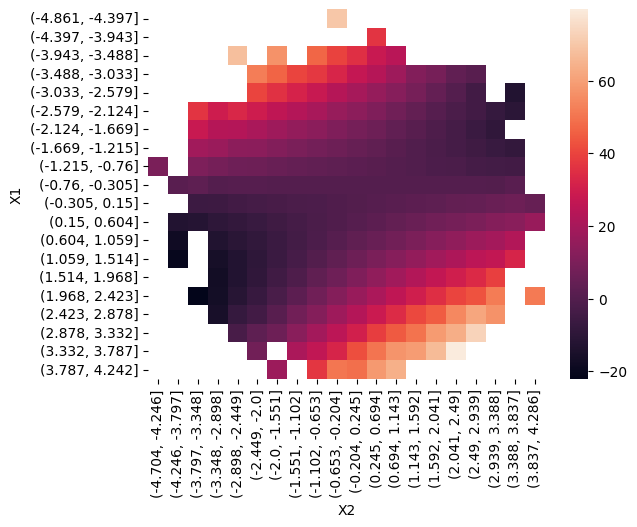

In [18]:
df2 = pd.DataFrame()
df2["X1"] = pd.cut(df.X1, bins = 20)
df2["X2"] = pd.cut(df.X2, bins = 20)
df2["Y"] = Y
sns.heatmap(pd.pivot_table(data = df2, index = "X1", columns = "X2", values = "Y", aggfunc = "mean"))

In [19]:
df_formula = df.copy()
df_formula["Y"] = Y
model = smf.ols(formula='Y ~ X1 * X2 + I(X1**2) + I(X2**2)', data=df_formula)
results = model.fit()
results.params

Intercept    -0.002008
X1            1.003378
X2            1.999813
X1:X2         4.000419
I(X1 ** 2)    2.998705
I(X2 ** 2)    0.001787
dtype: float64

In [20]:
df_formula = df.copy()
df_formula["Y"] = Y
model = smf.ols(formula='Y ~ X1 + X2 + I(X1 * X2) + I(X1**2) + I(X2**2)', data=df_formula)
results = model.fit()
results.params

Intercept    -0.002008
X1            1.003378
X2            1.999813
I(X1 * X2)    4.000419
I(X1 ** 2)    2.998705
I(X2 ** 2)    0.001787
dtype: float64

# Preventing Overfitting

### With X2**2 term

In [21]:
np.random.seed(0)
np.set_printoptions(threshold=1000)
kf = KFold(n_splits=5, shuffle=True, random_state=0)
[x for x in kf.split(df_formula)]
[y[:100] for x in kf.split(df_formula) for y in x]

[array([  0,   1,   2,   4,   5,   7,   8,  10,  11,  12,  13,  15,  16,
         18,  19,  20,  21,  22,  24,  27,  28,  29,  30,  31,  32,  33,
         35,  37,  38,  39,  40,  42,  43,  44,  45,  46,  47,  49,  50,
         53,  55,  57,  58,  59,  61,  62,  64,  66,  67,  70,  71,  73,
         74,  75,  76,  77,  78,  80,  81,  82,  83,  84,  85,  86,  87,
         88,  89,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
        102, 103, 104, 106, 107, 108, 111, 112, 113, 114, 115, 116, 118,
        120, 122, 123, 124, 126, 127, 129, 130, 131]),
 array([  3,   6,   9,  14,  17,  23,  25,  26,  34,  36,  41,  48,  51,
         52,  54,  56,  60,  63,  65,  68,  69,  72,  79,  90, 105, 109,
        110, 117, 119, 121, 125, 128, 133, 151, 156, 157, 165, 166, 170,
        181, 184, 187, 190, 191, 193, 196, 200, 208, 213, 216, 217, 218,
        220, 223, 240, 248, 258, 272, 275, 276, 278, 281, 284, 285, 286,
        292, 301, 302, 305, 320, 321, 328, 338, 339, 345, 354, 355, 3

In [22]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

rmse_list = list()
for train_index, test_index in kf.split(df_formula):
    #X = df_formula[train_index].drop(columns = ["Y"])
    #Y = df_formula[train_index].Y
    model = smf.ols(formula='Y ~ X1 * X2 + I(X1**2) + I(X2**2)', data=df_formula.iloc[train_index])
    results = model.fit()
    prediction = results.predict(df_formula.iloc[test_index])
    rmse_list.append(root_mean_squared_error(prediction, df_formula.iloc[test_index].Y))
print(sum(rmse_list) / len(rmse_list))

1.000439716539557


### Without X2**2 term

In [23]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

rmse_list = list()
for train_index, test_index in kf.split(df_formula):
    #X = df_formula[train_index].drop(columns = ["Y"])
    #Y = df_formula[train_index].Y
    model = smf.ols(formula='Y ~ X1 * X2 + I(X1**2)', data=df_formula.iloc[train_index])
    results = model.fit()
    prediction = results.predict(df_formula.iloc[test_index])
    rmse_list.append(root_mean_squared_error(prediction, df_formula.iloc[test_index].Y))
print(sum(rmse_list) / len(rmse_list))

1.00042013963043


### Without either squared term

In [24]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

rmse_list = list()
for train_index, test_index in kf.split(df_formula):
    #X = df_formula[train_index].drop(columns = ["Y"])
    #Y = df_formula[train_index].Y
    model = smf.ols(formula='Y ~ X1 * X2', data=df_formula.iloc[train_index])
    results = model.fit()
    prediction = results.predict(df_formula.iloc[test_index])
    rmse_list.append(root_mean_squared_error(prediction, df_formula.iloc[test_index].Y))
print(sum(rmse_list) / len(rmse_list))

4.3823298365123105
